#Feature Manipulation in Pandas

Here let's look at a different dataset that will allow us to really dive into some meaningful statistics. This data set is publically available, but is also part of a Kaggle competition.

You can get the data from here: https://www.kaggle.com/c/titanic-gettingStarted 

There are lots of iPython notebooks for looking at the Titanic data. Check them out and see you like any!

In [1]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("9xoqXVjBEF8")

In [2]:
# load the Titanic dataset
import pandas as pd
import numpy as np

df = pd.read_csv('data/titanic.csv') # read in the csv file

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print df.dtypes
print df.info()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)None


In [5]:
# the percentage of individuals that died on the titanic
float(len(df[df.Survived==0]))/len(df)*100.0

61.61616161616161

In [6]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')
print df_grouped.Survived.sum()
print '---------------------------------------'
print df_grouped.Survived.count()
print '---------------------------------------'
print df_grouped.Survived.sum() / df_grouped.Survived.count()

Pclass
1         136
2          87
3         119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1         216
2         184
3         491
Name: Survived, dtype: int64
---------------------------------------
Pclass
1         0.629630
2         0.472826
3         0.242363
Name: Survived, dtype: float64


## Feature Discretization

In [7]:
# let's break up the age variable
df['age_range'] = pd.cut(df.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) # this creates a new variable
df.age_range.describe()

count       714
unique        3
top       adult
freq        606
dtype: object

In [8]:
# now lets group with the new variable
df_grouped = df.groupby(by=['Pclass','age_range'])
print "Percentage of survivors in each group:"
print df_grouped.Survived.sum() / df_grouped.Survived.count() *100

Percentage of survivors in each group:
Pclass  age_range
1       adult        65.317919
        child        88.888889
        senior       25.000000
2       adult        42.666667
        child        90.476190
        senior        0.000000
3       adult        20.141343
        child        40.000000
        senior        0.000000
Name: Survived, dtype: float64


In [9]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
del df['PassengerId']
del df['Name']
del df['Cabin']
del df['Ticket']

# 2. Impute some missing values, grouped by their Pclass and SibSp numbers
df_grouped = df.groupby(by=['Pclass','SibSp'])
print df_grouped.describe()

                           Age        Fare       Parch    Survived
Pclass SibSp                                                      
1      0     count  113.000000  137.000000  137.000000  137.000000
             mean    39.181416   75.223356    0.270073    0.562044
             std     14.844591   87.103081    0.575270    0.497956
             min      4.000000    0.000000    0.000000    0.000000
             25%     28.000000   27.720800    0.000000    0.000000
             50%     37.000000   39.600000    0.000000    1.000000
             75%     50.000000   80.000000    0.000000    1.000000
             max     80.000000  512.329200    2.000000    1.000000
       1     count   65.000000   71.000000   71.000000   71.000000
             mean    37.414154   88.492021    0.422535    0.746479
             std     14.690355   40.307129    0.786711    0.438123
             min      0.920000   39.600000    0.000000    0.000000
             25%     28.000000   56.414600    0.000000    0.50

In [10]:
# now use this grouping to fill the data set in each group, then transform back
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['Pclass','SibSp']] = df[['Pclass','SibSp']]

print df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Sex          891 non-null object
Age          884 non-null float64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
age_range    714 non-null object
Pclass       891 non-null int64
SibSp        891 non-null int64
dtypes: float64(2), int64(4), object(3)None


In [11]:
# 3. Computed discrete features agains now with the newest values
df_imputed['age_range'] = pd.cut(df_imputed.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) # this creates a new variable

print df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Sex          891 non-null object
Age          884 non-null float64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
age_range    884 non-null object
Pclass       891 non-null int64
SibSp        891 non-null int64
dtypes: float64(2), int64(4), object(3)None


In [12]:
# 4. drop rows that still had missing values after grouped imputation
df_imputed.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed = df_imputed[['Survived','Age','age_range','Sex','Parch','SibSp','Pclass','Fare','Embarked']]

print df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 9 columns):
Survived     882 non-null int64
Age          882 non-null float64
age_range    882 non-null object
Sex          882 non-null object
Parch        882 non-null int64
SibSp        882 non-null int64
Pclass       882 non-null int64
Fare         882 non-null float64
Embarked     882 non-null object
dtypes: float64(2), int64(4), object(3)None


In [13]:
# did the statistics of survival change much? Let' check by repeating the previous grouped calcualtions
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
print "Percentage of survivors in each group, with imputed values:"
print df_grouped.Survived.sum() / df_grouped.Survived.count() *100

Percentage of survivors in each group, with imputed values:
Pclass  age_range
1       adult        62.189055
        child        88.888889
        senior       25.000000
2       adult        42.236025
        child        90.476190
        senior        0.000000
3       adult        22.303922
        child        37.837838
        senior        0.000000
Name: Survived, dtype: float64


In [14]:
df_sub = df_imputed[['Survived','Age','Pclass','Fare']]
df_normalized = (df_sub-df_sub.min())/(df_sub.max()-df_sub.min())

print df_normalized.describe()

         Survived         Age      Pclass        Fare
count  882.000000  882.000000  882.000000  882.000000
mean     0.385488    0.362094    0.653061    0.062068
std      0.486986    0.166808    0.417871    0.097168
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.271174    0.500000    0.015412
50%      0.000000    0.321438    1.000000    0.028213
75%      1.000000    0.459663    1.000000    0.059532
max      1.000000    1.000000    1.000000    1.000000


In [15]:
from sklearn.preprocessing import StandardScaler

df_matrix = df_imputed[['Survived','Age','Pclass','Fare']].values

s_obj = StandardScaler()
df_matrix_norm = s_obj.fit_transform(df_matrix)

print np.std(df_matrix_norm, axis=0) # unit std
print np.mean(df_matrix_norm, axis=0) # zero mean

[ 1.  1.  1.  1.]
[  9.17633316e-17   2.22862796e-16  -5.58132527e-16   6.89043179e-16]


#One Hot Encoding with Pandas

In [16]:
# using one hot encoding representations
tmpdf = pd.get_dummies(df_imputed['Sex'],prefix='gender')
tmpdf.head()

,gender_female,gender_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
# using one hot encoding representations
tmpdf = pd.get_dummies(df_imputed['Pclass'],prefix='class')
tmpdf.head()

,class_1,class_2,class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


# Visualization in Python with Pandas, Matplotlib, Seaborn, and MPLD3

In [18]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## Visualizing the dataset

Pandas has plenty of plotting abilities built in. Let's take a look at a few of the different graphing capabilities of Pandas with only matplotlib. Afterward, we can make the visualizations more beautiful.

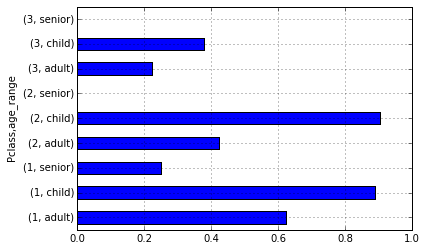

In [19]:
# Start by just plotting what we previsously grouped!
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()
ax = survival_rate.plot(kind='barh')

In [20]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([ df_imputed['Pclass'],df_imputed['age_range'] ], 
                       df_imputed.Survived.astype(bool))
print survival

Survived          False  True 
Pclass age_range              
1      adult         76    125
       child          1      8
       senior         3      1
2      adult         93     68
       child          2     19
       senior         2      0
3      adult        317     91
       child         46     28
       senior         2      0


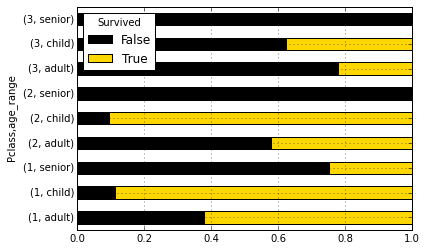

In [21]:
survival_rate = survival.div(survival.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
survival_rate.plot(kind='barh', 
                   stacked=True, 
                   color=['black','gold'])

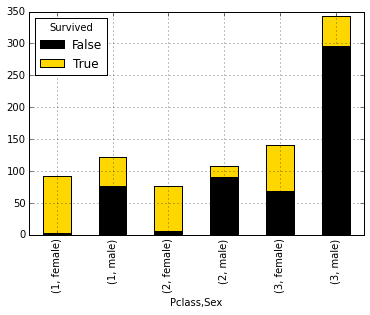

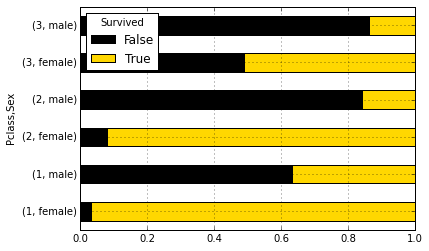

In [22]:
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463# 
survival_counts = pd.crosstab([df_imputed['Pclass'],df_imputed['Sex']], 
                              df_imputed.Survived.astype(bool))
survival_counts.plot(kind='bar', 
                     stacked=True, 
                     color=['black','gold'])

# divide the counts to get rates
survival_rate = survival_counts.div(survival_counts.sum(1).astype(float),axis=0)
survival_rate.plot(kind='barh', 
                   stacked=True, 
                   color=['black','gold'])


/Library/Python/2.7/site-packages/pandas/tools/plotting.py:2380: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


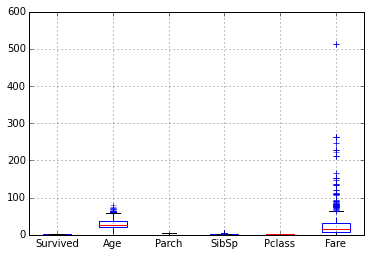

In [23]:
# pandas has some really powerful extensions to matplotlib for scientific computing 
ax = df_imputed.boxplot()

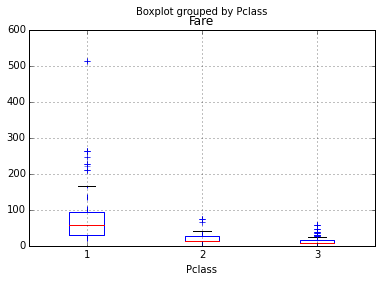

In [24]:
df_imputed.boxplot(column='Fare', by = 'Pclass')

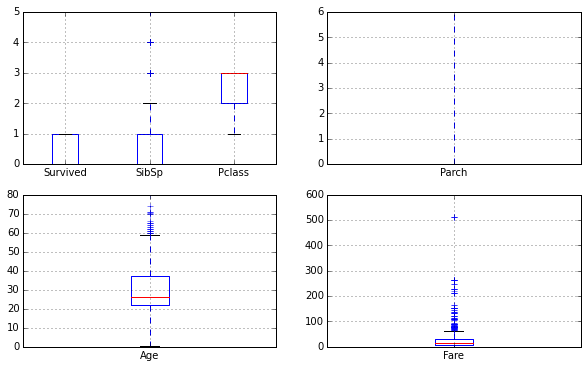

In [25]:
# lets look at the boxplots separately
vars_to_plot_separate = [['Survived','SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare'] ]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2, 
                2, 
                index+1)
    ax = df_imputed.boxplot(column=plot_vars)
plt.show()

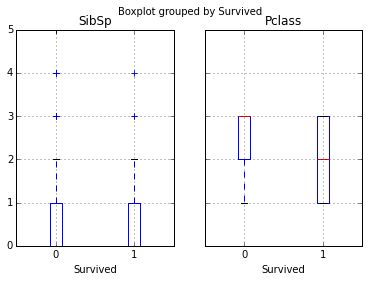

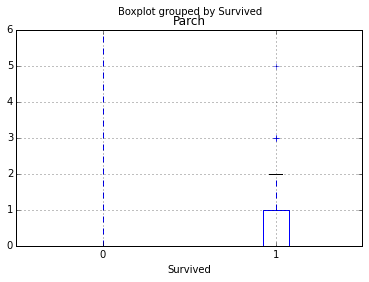

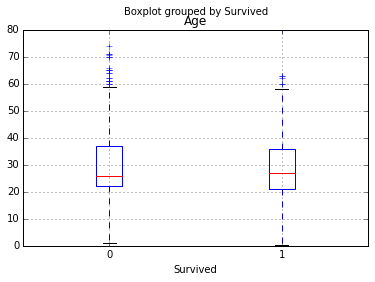

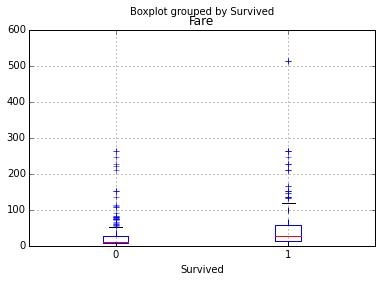

In [26]:
# lets look at the boxplots separately
vars_to_plot_separate = [['SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare']]

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4, 4))
    ax = df_imputed.boxplot(column=plot_vars, by='Survived')
plt.show()

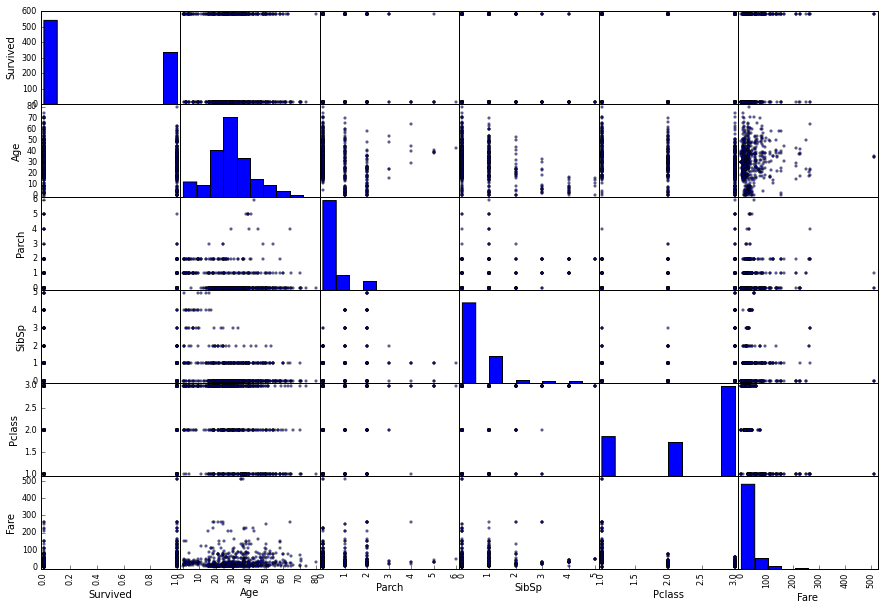

In [27]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(df_imputed,figsize=(15, 10))

/Library/Python/2.7/site-packages/pandas/core/generic.py:1858: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  self[name] = value


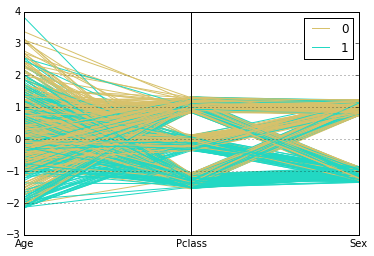

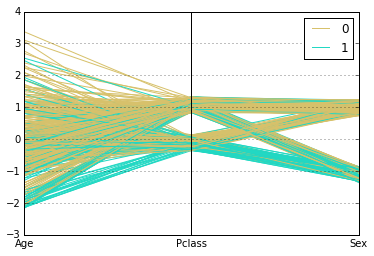

In [28]:
from pandas.tools.plotting import parallel_coordinates

# this plot is more meaningful when values are normalized
# parallel_coordinates(df_imputed[['Survived','Age','Pclass','Fare']],'Survived')

df_sub = df_imputed[['Survived','Age','Pclass','Sex']]
df_sub.Sex = df_sub.Sex=='male' 

df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.Survived = df_sub.Survived

# add some jitter to the Pclass and Sex variables
df_normalized.Pclass = df_normalized.Pclass+np.random.rand(*df_normalized.Pclass.shape)/2
df_normalized.Sex = df_normalized.Sex+np.random.rand(*df_normalized.Sex.shape)/2


parallel_coordinates(df_normalized,'Survived')

plt.figure()
parallel_coordinates(df_normalized[df_sub.Pclass>1],'Survived')



In [29]:
# from pandas.tools.plotting import andrews_curves

# # using frequency analysis to breakdwon the prediction
# plt.figure(figsize=(20,6))
# andrews_curves(df_imputed,"Survived")

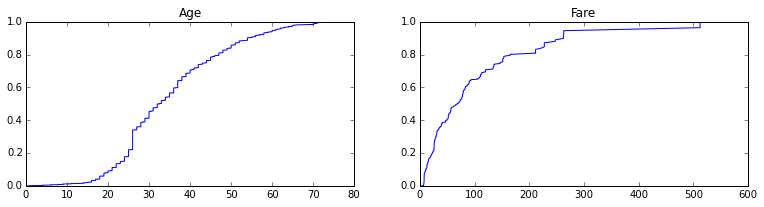

In [30]:
# import numpy as np

# make empirical CDFs
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,fi+1)
    x_ax = np.sort(df_imputed[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

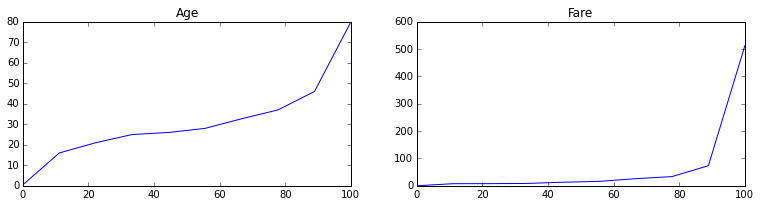

In [31]:
# make percentile plots
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['Age','Fare']):
    plt.subplot(3,3,fi+1)
    x_ax = np.linspace(0,100,10)
    y_ax = [np.percentile(df_imputed[feature], x_val) for x_val in x_ax]
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

# Simplifying with Seaborn
Now let's take a look at what we get from our previous import statement: 
+ `import seaborn as sns` 


In [32]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# now try plotting some of the previous plots, way more visually appealing!!

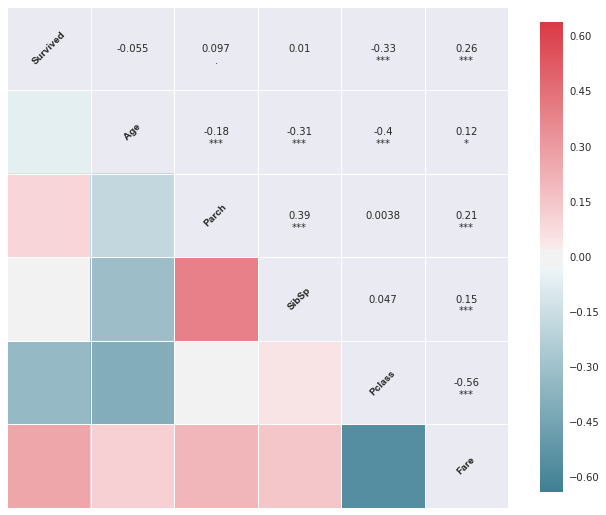

In [33]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.corrplot(df_imputed, 
             annot=True, # plot numeric annotations?
             sig_stars=True, # plot significance?
             diag_names=True, 
             cmap=cmap, 
             ax=ax)
f.tight_layout()

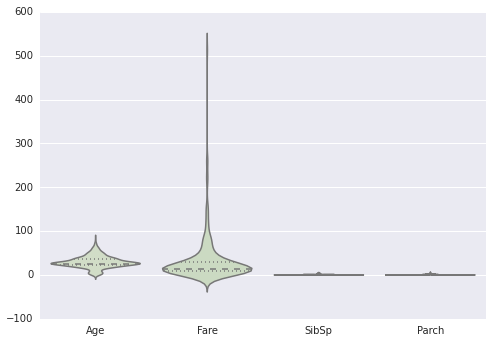

In [34]:

pal = sns.cubehelix_palette(40, rot=-.5, dark=.3)
sns.violinplot(df_imputed[['Age','Fare','SibSp','Parch']], 
               color=pal, 
               groupby=df_imputed.Survived.astype(bool))

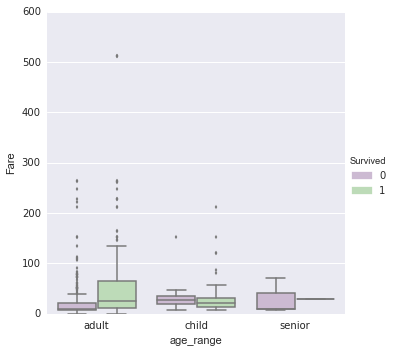

In [35]:
sns.factorplot('age_range','Fare','Survived',df_imputed, # grouped boxplot, second input should be numeric feature
               kind="box",
               palette="PRGn")

/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


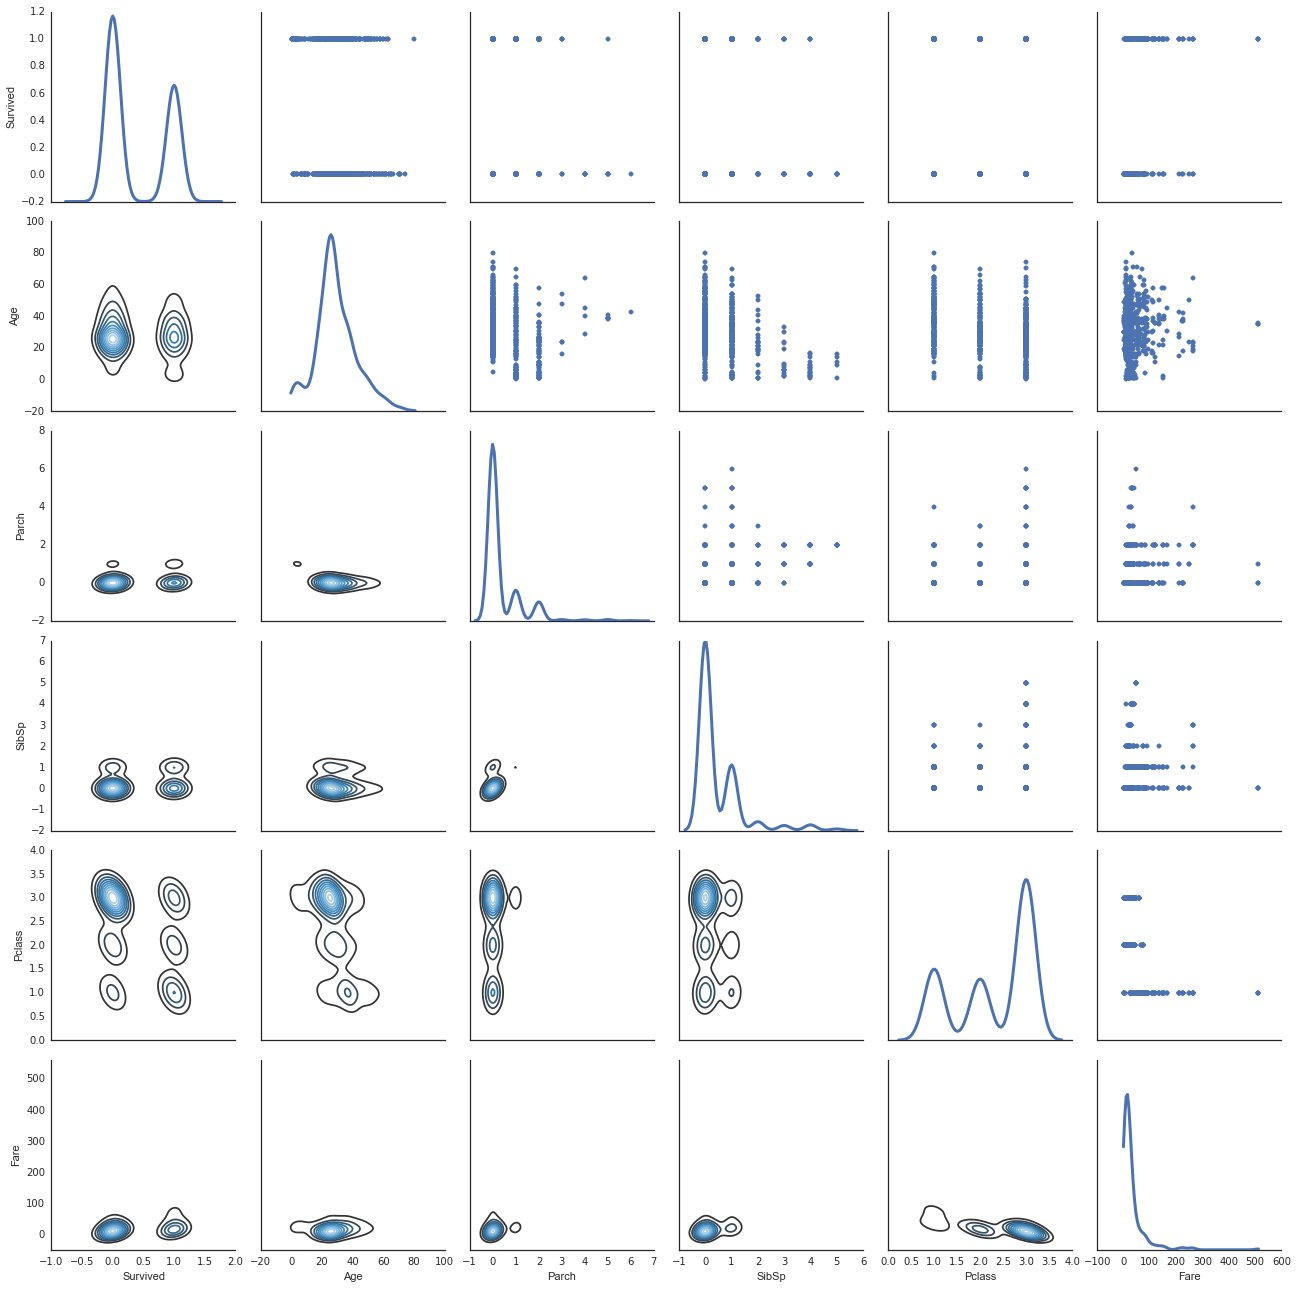

In [36]:
sns.set(style="white")

# create a plot grid
g = sns.PairGrid(df_imputed, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use kde on the lower
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal

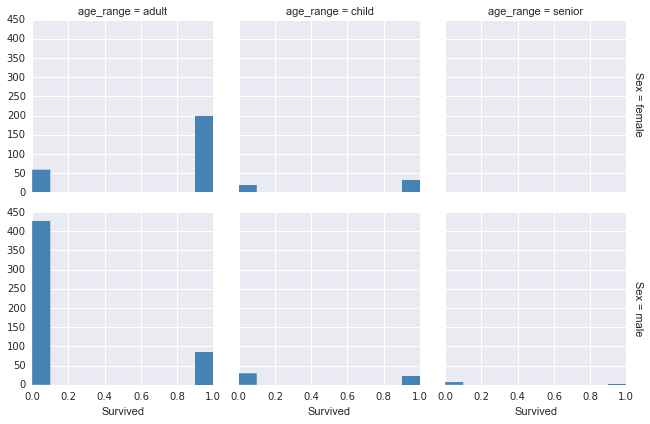

In [37]:
sns.set(style="darkgrid")

g = sns.FacetGrid(df_imputed, col="age_range", row="Sex", margin_titles=True)
g.map(plt.hist, "Survived", color="steelblue", lw=0)

<matplotlib.colorbar.Colorbar instance at 0x11016cf38>

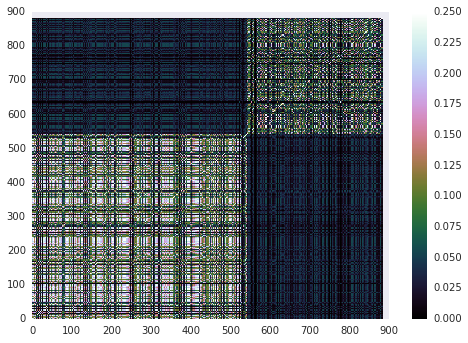

In [38]:
# plot the similarity matrix using matplotlib
from scipy.spatial import distance

sns.set(rc={'image.cmap': 'cubehelix'})

# get a subset of the data, and normalize it
df_sub = df_imputed[['Survived','Age','Pclass','Fare']]
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_sorted = df_normalized.sort(columns='Survived')
Y = distance.pdist(df_sorted, "euclidean")
A = distance.squareform(Y)
S = 0.5/(1+np.exp(A)) # convert from distance to similarity
#plot the similarity matrix using seaborn color utilities

# plt.figure(figsize=(20,10))
plt.pcolormesh(S)
plt.colorbar()

# Integrating with D3
It is also possibly to make really wonderful interactive graphs using the `mpld3` library. It brings to life all the plots that would otherwise just be rendered onto a PNG. It builds on top of `matplotlib`, but not all features are supported. Check out the example below to see how mpld3 works. 

In [39]:
# lets us a seaborn example and integrate with D3
import mpld3

sns.set(style="darkgrid") # one of the many styles to plot using

g = sns.FacetGrid(df_imputed, col="age_range", row="Sex", margin_titles=True)
g.map(plt.hist, "Survived", color="steelblue", lw=0)

mpld3.display() # add d3 vector graphics support
# go to the corner of the image to enable zooming, etc

In [40]:
# of course, not everything is enabled by mpld3, for instance the violin plot does not display the names

pal = sns.cubehelix_palette(40, rot=-.5, dark=.3)
sns.violinplot(df_imputed[['Fare','Age']], color=pal)

mpld3.display() # add d3 vector graphics support


In [41]:
# And the boxplot is almost not supported at all!

sns.factorplot('Sex','Fare','Survived',df_imputed, # grouped boxplot
               kind="box",
               palette="PRGn")

mpld3.display() # add d3 vector graphics support
# YIKES!
